# 34일차

### 연습문제
- convolution층: 필터수 50개, 필터크기3x3,패팅적용
- pooling층:2x2격자
- convolution층: 필터수 100개, 필터크기5x5,패팅적용
- pooling층:3x3격자
- flatten층

입력이미지가 1600x800x3 일때, 각층을 통해 변환된 이미지의 모양을 확인해보시오.
> 패팅을 적용하지 않았을 경우의 모양도 확인해 보시오.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
import tensorflow as tf
from tensorflow import keras

In [2]:
bird = plt.imread('bird.jpg')

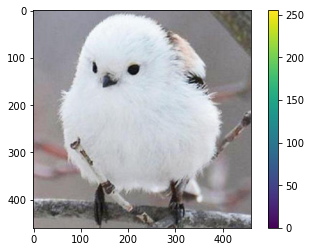

In [3]:
plt.imshow(bird)
plt.colorbar()

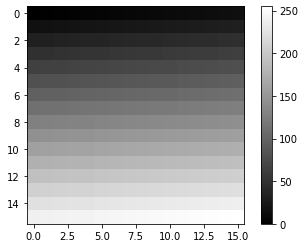

In [4]:
img = np.arange(256).reshape(16,16)
plt.imshow(img, cmap='gray')
plt.colorbar()

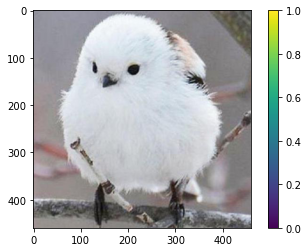

In [6]:
bird = bird/255 # 실수로 변환 (0~1)
plt.imshow(bird)
plt.colorbar()

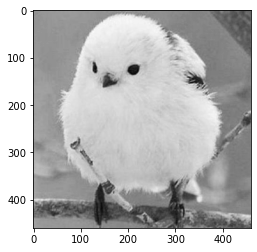

In [7]:
img = bird[:,:,0] # R channel 분리
plt.imshow(img, cmap='gray', vmin=0, vmax=1)

### Blur

In [8]:
filter = np.array([[1,0,1],[0,1,0],[1,0,1]])/5
filter

array([[0.2, 0. , 0.2],
       [0. , 0.2, 0. ],
       [0.2, 0. , 0.2]])

In [14]:
w, h = img.shape
conv = []

for i in range(h-3+1):
    l = []
    
    for j in range(w-3+1):
        r = (img[i:i+3, j:j+3]*filter).sum()
        l.append(r)
        
    conv.append(l)
    
conv = np.array(conv, dtype=float)

In [15]:
conv.shape, conv.max(), conv.min()

((458, 458), 0.9741176470588236, 0.045490196078431376)

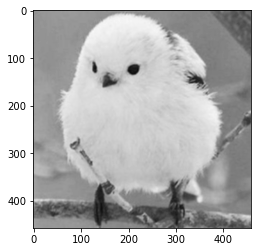

In [11]:
plt.imshow(conv, cmap='gray', vmin=0, vmax=1)

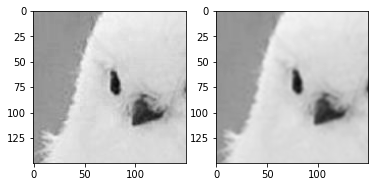

In [13]:
plt.subplot(1,2,1)
plt.imshow(img[50:200, 50:200], cmap='gray', vmin=0, vmax=1)
plt.subplot(1,2,2)
plt.imshow(conv[50:200, 50:200], cmap='gray', vmin=0, vmax=1)

### sharpen
- np.array([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]]) => 외곽선
- np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]]) => 샤프닝


In [17]:
filter = np.array([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]])
filter

array([[-1, -1, -1],
       [-1,  8, -1],
       [-1, -1, -1]])

In [18]:
w, h = img.shape
conv = []

for i in range(h-3+1):
    l = []
    
    for j in range(w-3+1):
        r = (img[i:i+3, j:j+3]*filter).sum()
        l.append(r)
        
    conv.append(l)
    
conv = np.array(conv, dtype=float)

In [19]:
conv.shape, conv.max(), conv.min()

((458, 458), 2.3450980392156855, -2.0941176470588236)

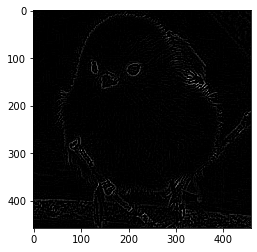

In [20]:
plt.imshow(conv, cmap='gray', vmin=0, vmax=1)

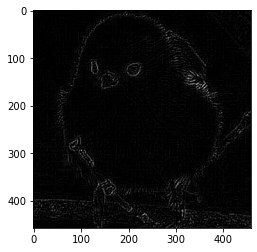

In [21]:
conv2 = conv.copy()
conv2[conv<0] = 0
conv2[conv>1] = 1

plt.imshow(conv2, cmap='gray', vmin=0, vmax=1)

In [22]:
filter = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
filter

array([[-1, -1, -1],
       [-1,  9, -1],
       [-1, -1, -1]])

In [23]:
w, h = img.shape
conv = []

for i in range(h-3+1):
    l = []
    
    for j in range(w-3+1):
        r = (img[i:i+3, j:j+3]*filter).sum()
        l.append(r)
        
    conv.append(l)
    
conv = np.array(conv, dtype=float)

In [24]:
conv.shape, conv.max(), conv.min()

((458, 458), 3.172549019607842, -2.011764705882353)

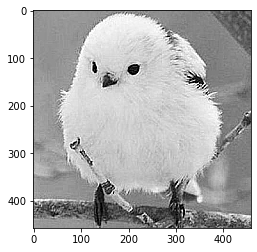

In [25]:
plt.imshow(conv, cmap='gray', vmin=0, vmax=1)

## 이미지 처리 딥러닝
# Cifar10 분류

In [27]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

170500096/170498071 [==============================] - 11s 0us/step


((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [28]:
X_train.dtype, X_train.max(), X_train.min()

(dtype('uint8'), 255, 0)

In [31]:
np.bincount(y_train.ravel())

TypeError: Cannot cast array data from dtype('float64') to dtype('int64') according to the rule 'safe'

### 데이터 전처리

In [29]:
X_train = X_train/255
X_test = X_test/255

y_train = np.eye(10)[y_train.ravel()]
y_test = np.eye(10)[y_test.ravel()]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 10), (10000, 32, 32, 3), (10000, 10))